In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from zarr_file import ZarrFile

In [6]:
mesh_init_file = '../sea_ice_age/mesh_arctic_ease_25km_max7.npz'
with np.load(mesh_init_file) as data:
    xc = data['xc']
    yc = data['yc'][::-1]
    mask = data['mask']

In [ ]:
lmsiage_file = 'NERSC_arctic25km_sea_ice_age_v2p1/zarr/grid/2015/grid_20150101.zip'
mf = ZarrFile(lmsiage_file)
lmsiage = mf.load()
print(lmsiage.keys())

dict_keys(['sic_7yi', 'sic_3yi', 'age', 'unc_4yi', 'unc_2yi', 'sic_2yi', 'unc_3yi', 'unc_5yi', 'unc_age', 'sic_1yi', 'unc_1yi', 'unc_6yi', 'sic_5yi', 'sic_4yi', 'sic_6yi', 'unc_7yi'])


In [ ]:
nsidc_file = 'iceage_nh_12.5km_20150101_20151231_v4.1.nc'
with xr.open_dataset(nsidc_file) as ds:
    nsidc_age = ds['age_of_sea_ice'][0].values
    nsidc_x = ds['x'].values
    nsidc_y = ds['y'].values
print(np.diff(nsidc_x).mean())

12533.765


In [11]:
newsidc_file = 'outputs/2015/01/newdc_age_20150101.zip'
zf = ZarrFile(newsidc_file)
data1 = zf.load()
print((xc.max() - xc.min()) / data1['age'].shape[1], sorted(data1.keys()))

12.471064814814815 ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 'age']


Text(0.5, 1.0, 'NewDC Points')

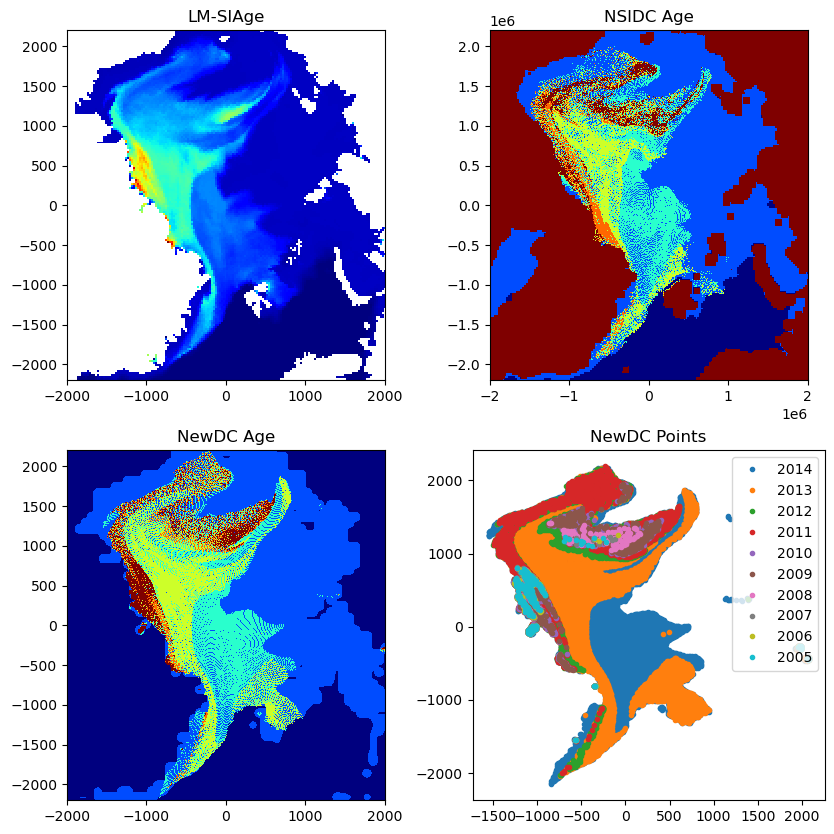

In [33]:
clim=[0, 5]
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs.flat[0].imshow(lmsiage['age'], extent=(xc.min(), xc.max(), yc.min(), yc.max()), cmap='jet', clim=clim, interpolation='none')
axs.flat[0].set_xlim([-2000, 2000])
axs.flat[0].set_ylim([-2200, 2200])
axs.flat[0].set_title('LM-SIAge')

axs.flat[1].imshow(nsidc_age, extent=(nsidc_x.min(), nsidc_x.max(), nsidc_y.min(), nsidc_y.max()), origin='lower', cmap='jet', clim=clim, interpolation='none')
axs.flat[1].set_xlim([-2000e3, 2000e3])
axs.flat[1].set_ylim([-2200e3, 2200e3])
axs.flat[1].set_title('NSIDC Age')    

axs.flat[2].imshow(data1['age'], extent=(xc.min(), xc.max(), yc.min(), yc.max()), cmap='jet', clim=clim, interpolation='none')
axs.flat[2].set_xlim([-2000, 2000])
axs.flat[2].set_ylim([-2200, 2200])
axs.flat[2].set_title('NewDC Age')    

years = sorted([k for k in data1.keys() if k != 'age'], reverse=True)
for i, year in enumerate(years):
    axs.flat[3].plot(*data1[year], '.', alpha=1, label=year)
axs.flat[3].legend()
axs.flat[3].set_title('NewDC Points')    